## Importing Libraries

In [133]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import Data from Excel Sheet

In [134]:
file_name =  "Dataset.xls"
sheet =  'Heart Disease 1'

df = pd.read_excel(io=file_name, sheet_name=sheet)

# Data Processing

## Select the given attributes

In [135]:
#BMI, Smoking, PhysicalHealth, Race, Age
df = df[['BMI', 'Smoking', 'PhysicalHealth', 'Race', 'AgeCategory', 'SkinCancer']]

## Remove '0' values from PhysicalHealth

In [136]:
df = df[df.PhysicalHealth != 0]

## Select first 100 rows

In [137]:
df=df.head(100)

df

,BMI,Smoking,PhysicalHealth,Race,AgeCategory,SkinCancer
0,16.60,Yes,3,White,55-59,Yes
2,26.58,Yes,20,White,65-69,No
4,23.71,No,28,White,40-44,No
5,28.87,Yes,6,Black,75-79,No
6,21.63,No,15,White,70-74,Yes
...,...,...,...,...,...,...
218,33.01,Yes,14,Black,70-74,No
219,25.84,Yes,20,White,55-59,No
222,21.21,No,7,Black,80 or older,No
224,21.30,No,2,White,60-64,Yes


## Change the intervals to midpoint values

In [138]:
for i in df['AgeCategory']:
    if i == '18-24':
        df['AgeCategory'] = df['AgeCategory'].replace(['18-24'], 21)
    elif i == '25-29':
        df['AgeCategory'] = df['AgeCategory'].replace(['25-29'], 27)
    elif i == '30-34':
        df['AgeCategory'] = df['AgeCategory'].replace(['30-34'], 32)
    elif i == '35-39':
        df['AgeCategory'] = df['AgeCategory'].replace(['35-39'], 37)
    elif i == '40-44':
        df['AgeCategory'] = df['AgeCategory'].replace(['40-44'], 42)
    elif i == '45-49':
        df['AgeCategory'] = df['AgeCategory'].replace(['45-49'], 47)
    elif i == '50-54':
        df['AgeCategory'] = df['AgeCategory'].replace(['50-54'], 52)
    elif i == '55-59':
        df['AgeCategory'] = df['AgeCategory'].replace(['55-59'], 57)
    elif i == '60-64':
        df['AgeCategory'] = df['AgeCategory'].replace(['60-64'], 62)
    elif i == '65-69':
        df['AgeCategory'] = df['AgeCategory'].replace(['65-69'], 67)
    elif i == '70-74':
        df['AgeCategory'] = df['AgeCategory'].replace(['70-74'], 72)
    elif i == '75-79':
        df['AgeCategory'] = df['AgeCategory'].replace(['75-79'], 77)
    elif i == '80 or older':
        df['AgeCategory'] = df['AgeCategory'].replace(['80 or older'], 87)

## Change string to Int/Float

In [139]:
from sklearn.preprocessing import LabelEncoder

In [140]:
le_race = LabelEncoder()
df['Race'] = le_race.fit_transform(df['Race'])
for i in df['Smoking']:
    if i == 'Yes':
        df['Smoking'] = df['Smoking'].replace(['Yes'], int(1))
    elif i == 'No':
        df['Smoking'] = df['Smoking'].replace(['No'], int(0))
for i in df['SkinCancer']:
    if i == 'Yes':
        df['SkinCancer'] = df['SkinCancer'].replace(['Yes'], int(1))
    elif i == 'No':
        df['SkinCancer'] = df['SkinCancer'].replace(['No'], int(0))
df

,BMI,Smoking,PhysicalHealth,Race,AgeCategory,SkinCancer
0,16.60,1,3,3,57,1
2,26.58,1,20,3,67,0
4,23.71,0,28,3,42,0
5,28.87,1,6,1,77,0
6,21.63,0,15,3,72,1
...,...,...,...,...,...,...
218,33.01,1,14,1,72,0
219,25.84,1,20,3,57,0
222,21.21,0,7,1,87,0
224,21.30,0,2,3,62,1


## Exploratory Data Analysis

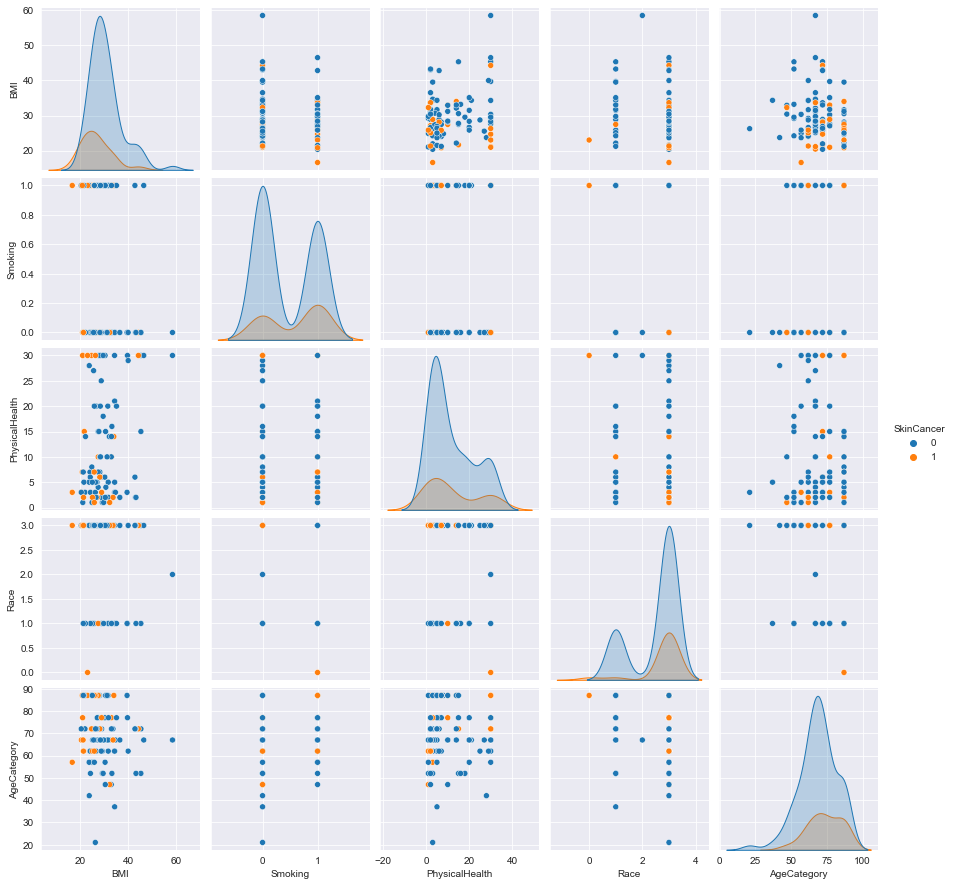

In [141]:
sns.pairplot(data=df, hue = 'SkinCancer')

# Model Fitting & Test
## Split Input and Target Columns and Split Train-Test Data

In [142]:
target = df['SkinCancer']
inputs = df.drop(['SkinCancer'], axis=1)

x = inputs.values
y = target.values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [143]:
def entropy(y):
    n = len(y)
    s = np.unique(y, return_counts=True)
    print(s)
    p = s[1]/n
    return -np.sum(p*np.log2(p))

entropy(df['BMI'])
# entropy(df['Smoking'])
# entropy(df['PhysicalHealth'])
# entropy(df['Race'])
# entropy(df['AgeCategory'])
# entropy(df['SkinCancer'])

# 'BMI', 'Smoking', 'PhysicalHealth', 'Race', 'AgeCategory', 'SkinCancer'

(array([16.6 , 20.37, 20.43, 20.8 , 20.94, 21.03, 21.14, 21.21, 21.3 ,
       21.48, 21.63, 21.93, 22.14, 23.01, 23.67, 23.71, 24.02, 24.13,
       24.21, 24.62, 24.68, 24.8 , 24.89, 25.  , 25.06, 25.11, 25.54,
       25.8 , 25.83, 25.84, 26.25, 26.26, 26.29, 26.37, 26.58, 26.63,
       26.89, 27.05, 27.12, 27.44, 27.46, 27.63, 27.76, 28.13, 28.15,
       28.19, 28.29, 28.35, 28.41, 28.73, 28.87, 28.89, 28.9 , 29.18,
       29.53, 29.76, 30.23, 30.34, 30.41, 30.55, 30.67, 31.09, 31.18,
       31.48, 31.64, 31.66, 31.75, 32.1 , 32.28, 32.92, 32.98, 33.01,
       33.2 , 33.65, 33.67, 34.01, 34.3 , 34.34, 34.67, 35.11, 36.52,
       39.53, 39.71, 39.99, 42.83, 43.05, 43.27, 44.29, 45.33, 45.35,
       46.52, 58.54]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1,

6.4763073147530905

## Decision Tree Classifier

In [144]:
clf_tree = DecisionTreeClassifier(criterion='entropy', random_state = 100, max_depth=3, min_samples_leaf=5)
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

## Plot Tree

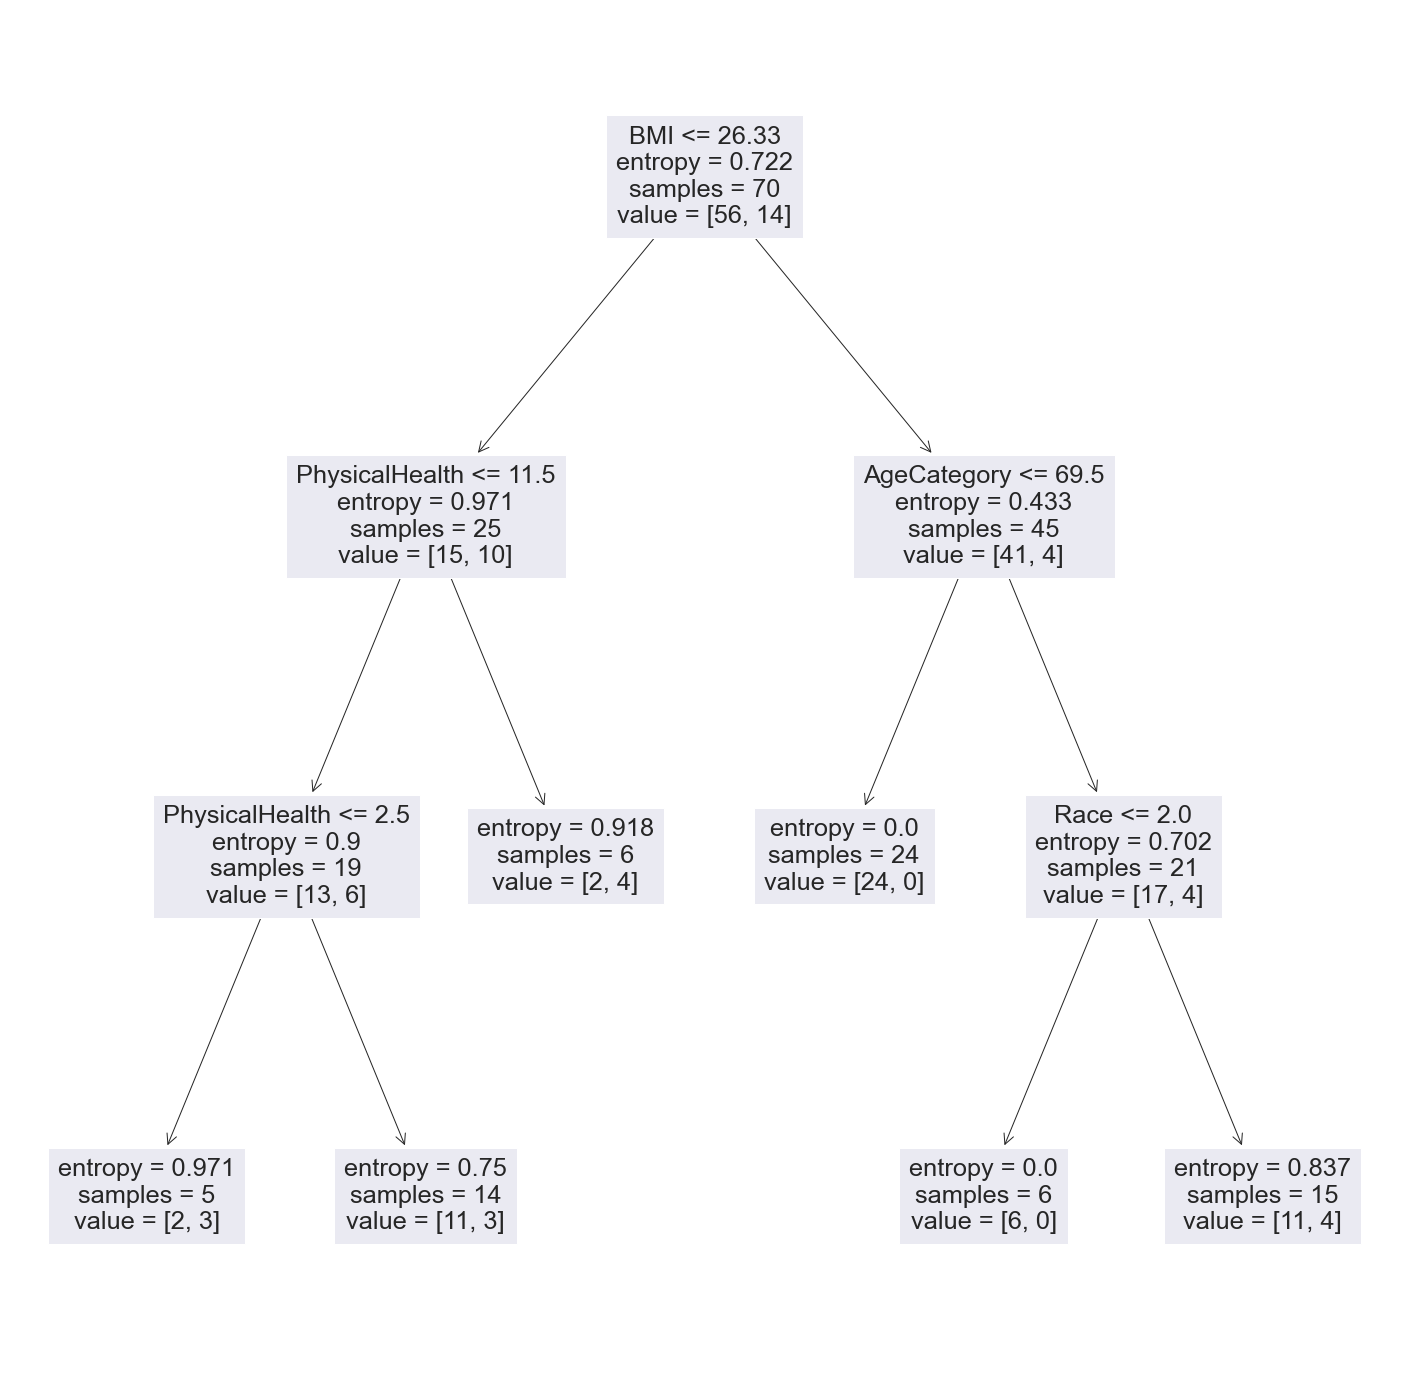

In [145]:
fig, ax = plt.subplots(figsize=(25,25))
tree.plot_tree(clf_tree, ax=ax, feature_names=['BMI', 'Smoking', 'PhysicalHealth', 'Race', 'AgeCategory'])
plt.show()

## Show Predicted Values

In [146]:
y_pred = clf_tree.predict(X_test)
print("Predicted values:")
print(y_pred)

Predicted values:
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0]


## Show Results

In [147]:
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))

print ("Accuracy : ",accuracy_score(y_test,y_pred)*100)

print("Report :\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[20  2]
 [ 6  2]]
Accuracy :  73.33333333333333
Report :
               precision    recall  f1-score   support

           0       0.77      0.91      0.83        22
           1       0.50      0.25      0.33         8

    accuracy                           0.73        30
   macro avg       0.63      0.58      0.58        30
weighted avg       0.70      0.73      0.70        30



## Confusion Matrix - Using Seaborn

Text(0.5, 1.0, 'Accuracy Score: 73.33')

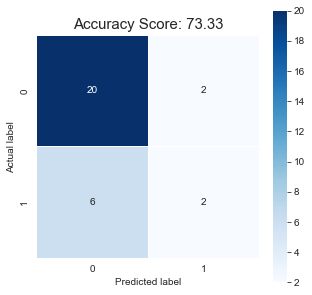

In [148]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm, linewidths=.5, annot=True, square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {:.2f}'.format(accuracy_score(y_test,y_pred)*100)
plt.title(all_sample_title, size = 15)

## Check Entropy

In [149]:
from scipy.stats import entropy
E1 = entropy(df.groupby(['BMI']).size(), base=2)
print(E1)
E2 = entropy(df.groupby(['Smoking']).size(), base=2)
print(E2)
E3 = entropy(df.groupby(['PhysicalHealth']).size(), base=2)
print(E3)
E4 = entropy(df.groupby(['Race']).size(), base=2)
print(E4)
E5 = entropy(df.groupby(['AgeCategory']).size(), base=2)
print(E5)
E6 = entropy(df.groupby(['SkinCancer']).size(), base=2)
print(E6)
# 'BMI', 'Smoking', 'PhysicalHealth', 'Race', 'AgeCategory', 'SkinCancer'

6.476307314753088
0.9974015885677396
3.7569652439074894
0.8768568400846984
2.925080159212738
0.7601675029619656
